<a href="https://colab.research.google.com/github/BinarySstar/Credit-Card-Segment-Classfication/blob/master/Credit_Card_Segment_Classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Drive Mount

In [1]:
# from google.colab import drive

# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- 한글 폰트 적용을 위해 폰트 설치 및 적용

In [1]:
# # 한글 폰트 설정 (Colab용)
# !apt-get -qq install -y fonts-nanum

# matplotlib 라이브러리를 불러옵니다.
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 설치된 폰트 목록을 갱신하고, 'NanumGothic' 폰트를 기본 폰트로 설정합니다.
font_path = 'C:/Windows/Fonts/NanumGothic.ttf' 
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# !fc-list :lang=ko

/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf: NanumSquareRound,나눔스퀘어라운드,NanumSquareRound Bold,나눔스퀘어라운드 Bold:style=Bold,Regular
/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf: NanumGothicCoding,나눔고딕코딩:style=Bold
/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf: NanumSquareRound,나눔스퀘어라운드,NanumSquareRound Regular,나눔스퀘어라운드 Regular:style=Regular
/usr/share/fonts/truetype/nanum/NanumSquareB.ttf: NanumSquare,나눔스퀘어,NanumSquare Bold,나눔스퀘어 Bold:style=Bold
/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf: NanumBarunGothic,나눔바른고딕:style=Regular
/usr/share/fonts/truetype/nanum/NanumGothic.ttf: NanumGothic,나눔고딕:style=Regular
/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf: NanumGothicCoding,나눔고딕코딩:style=Regular
/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf: NanumBarunGothic,나눔바른고딕:style=Bold
/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf: NanumGothic,나눔고딕:style=Bold
/usr/share/fonts/truetype/nanum/NanumSquareR.ttf: NanumSquare,나눔스퀘어:style=Regular
/us

# EDA
## 데이터 로드
- parquet 형식의 데이터를 로드

In [ ]:
%pip install fastparquet

- 전체 parquet 파일에 대한 요약

In [5]:
# import pandas as pd
# import os
# from glob import glob

# # Google Drive 경로 설정
# base_path = "drive/MyDrive/고급프로그래밍/train"

# # 폴더 이름 정의
# folder_name = ["회원정보", "신용정보", "승인매출정보", "청구입금정보", "잔액정보", "채널정보", "마케팅정보", "성과정보"]
# folders = [f"{i}.{name}" for i, name in enumerate(folder_name, start=1)]

# # 요약 결과를 정리하는 list
# summary_list = []

# for folder in folders:
#     folder_path = os.path.join(base_path, folder)
#     parquet_files = glob(os.path.join(folder_path, "*.parquet"))

#     for file in parquet_files:
#         try:
#             df = pd.read_parquet(file, engine="fastparquet")

#             info = {
#                 "폴더명": folder,
#                 "파일명": file,
#                 "행 수": df.shape[0],
#                 "열 수": df.shape[1],
#                 "컬럼 목록": df.columns.tolist(),
#                 "데이터 타입": df.dtypes.to_dict(),
#                 "결측치 비율": df.isnull().mean().to_dict(),
#                 "샘플 데이터": df.head().to_dict()
#             }

#             summary_list.append(info)
#             print(f"✅ {file} 로드 완료")

#         except Exception as e:
#             print(f"❌ {file} 처리 중 오류: {e}")

# # 결과 DataFrame으로 정리
# summary_df = pd.DataFrame(summary_list)
# summary_df

- 모든 parquet 파일의 row는 400000개, column은 카테고리 별로 동일하다.
  - EDA를 수행할 때 메모리 효율성과 속도를 고려한 분석 전략이 중요하다.
- 카테고리 별로 column의 데이터 타입과 의미가 동일하다.


## 세그먼트 불균형 확인
- 전체 Segment(A~E)의 데이터 불균형 정도 확인
- 월별 Segment 분포 변화 확인하여 시계열 성격 확인
- 각 Segment별 고객 수 비율 파악

Segment
A       162
B        24
C     21265
D     58207
E    320342
Name: count, dtype: int64
Segment
A    0.000405
B    0.000060
C    0.053163
D    0.145517
E    0.800855
Name: proportion, dtype: float64


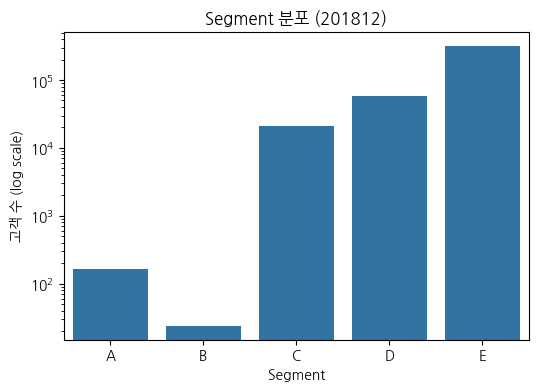

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 회원정보 데이터 불러오기 (201812 기준)
file_path = "../dataset/train/1.회원정보/201812_train_회원정보.parquet"
df = pd.read_parquet(file_path)

# Segment 분포 확인
segment_counts = df["Segment"].value_counts().sort_index()
print(segment_counts)

print("=========================")
segment_ratio = df["Segment"].value_counts(normalize=True).sort_index()
print(segment_ratio)

# 수 확인
plt.figure(figsize=(6,4))
sns.barplot(x=segment_counts.index, y=segment_counts.values)
plt.yscale("log")
plt.title("Segment 분포 (201812)")
plt.ylabel("고객 수 (log scale)")
plt.xlabel("Segment")
plt.show()

### 🔍 분석
- 극심한 클래스 불균형이 존재함.
  - Segment E 하나가 전체 고객의 80% 이상 차지
  - Segment A, B는 희소 클래스 (합쳐도 전체의 0.05% 수준)
  - 로그 스케일로 표현했기 때문에 A/B가 보이지만, 실제로는 거의 사라지는 수준

- A, B 세그먼트는 중요한 VIP 혹은 고위험군 고객을 분류하는 세그먼트일 가능성이 높다.

> 👉 모델 학습 시 Segment A와 B를 예측하는 것이 매우 어려우며, 모델이 Segment E에 편향될 위험이 큼. 모델링 시 소수 클래스 예측을 위한 특수한 처리가 필수

## 세그먼트 별 고객 특성 확인
- 고객의 기본 프로필(성별, 연령, 회원등급 등)이 Segment 간 어떤 차이를 보이는지 파악
- 특정 Segment가 어떤 고객군을 대표하는지 추론

In [7]:
# df의 column 확인
df.columns

Index(['기준년월', 'ID', '남녀구분코드', '연령', 'Segment', '회원여부_이용가능', '회원여부_이용가능_CA',
       '회원여부_이용가능_카드론', '소지여부_신용', '소지카드수_유효_신용', '소지카드수_이용가능_신용', '입회일자_신용',
       '입회경과개월수_신용', '회원여부_연체', '이용거절여부_카드론', '동의여부_한도증액안내', '수신거부여부_TM',
       '수신거부여부_DM', '수신거부여부_메일', '수신거부여부_SMS', '가입통신회사코드', '탈회횟수_누적',
       '최종탈회후경과월', '탈회횟수_발급6개월이내', '탈회횟수_발급1년이내', '거주시도명', '직장시도명', '마케팅동의여부',
       '유효카드수_신용체크', '유효카드수_신용', '유효카드수_신용_가족', '유효카드수_체크', '유효카드수_체크_가족',
       '이용가능카드수_신용체크', '이용가능카드수_신용', '이용가능카드수_신용_가족', '이용가능카드수_체크',
       '이용가능카드수_체크_가족', '이용카드수_신용체크', '이용카드수_신용', '이용카드수_신용_가족', '이용카드수_체크',
       '이용카드수_체크_가족', '이용금액_R3M_신용체크', '이용금액_R3M_신용', '이용금액_R3M_신용_가족',
       '이용금액_R3M_체크', '이용금액_R3M_체크_가족', '_1순위카드이용금액', '_1순위카드이용건수',
       '_1순위신용체크구분', '_2순위카드이용금액', '_2순위카드이용건수', '_2순위신용체크구분',
       '최종유효년월_신용_이용가능', '최종유효년월_신용_이용', '최종카드발급일자', '보유여부_해외겸용_본인',
       '이용가능여부_해외겸용_본인', '이용여부_3M_해외겸용_본인', '보유여부_해외겸용_신용_본인',
       '이용가능여부_해외겸용_신용_본인', '이용여부_3M_해외겸용_신용_본인', '연회비발생카드수_B0M',
 

- column이 너무 많아 모든 column에 대해 분석하기는 어려움
- 핵심 column 일부를 이용하여 세그먼트 분석 진행

| 항목 | 변수명 | 분석 방식 |
|------|---|---|
|🎂 연령 | 연령 | Boxplot, 평균 비교|
👨‍👩‍👧 성별 | 남녀구분코드 | Countplot (hue by Segment)
🎓 회원 등급/이용 가능 여부 | 회원여부_이용가능, 회원여부_이용가능_CA, 회원여부_이용가능_카드론 | Countplot
💳 카드 보유 수 | 소지카드수_유효_신용, 소지카드수_이용가능_신용 | 평균 비교
🕒 카드 사용 경과 | 입회경과개월수_신용, 최종카드발급경과월 | Boxplot
📩 마케팅 수신 동의 여부 | 마케팅동의여부 | 비율 비교

### 🎂 세그먼트 별 연령 분석

c:\Users\Lee JinSeoung\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


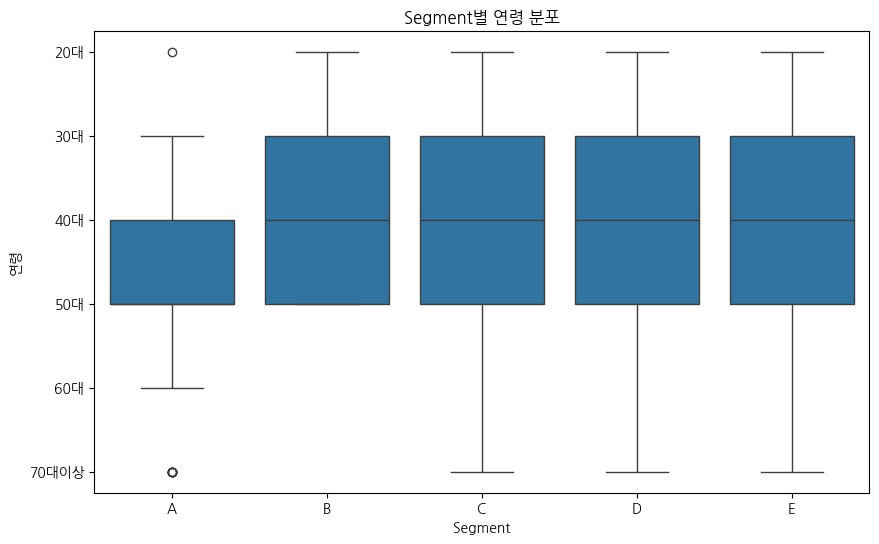

In [5]:
age_order = ['20대', '30대', '40대', '50대', '60대', '70대이상']
df['연령'] = pd.Categorical(df['연령'], categories=age_order, ordered=True)

plt.figure(figsize=(10,6))
sns.boxplot(x='Segment', y='연령', data=df, order=['A', 'B', 'C', 'D', 'E'])
plt.title("Segment별 연령 분포")
plt.xlabel("Segment")
plt.ylabel("연령")
plt.show()

🔹 Segment A
- 중앙값: 50대
- 범위가 좁고, 이상치(20대, 70대 이상)가 소수 존재
- 전체적으로 고연령 중심, 비교적 안정된 장기 고객일 가능성 높음

→ 고객 수는 적지만, 고정적이며 신용도 높은 집단일 수 있음

🔹 Segment B
- 중앙값: 40대
- 연령대 폭은 넓음, 특히 20대~60대까지 고르게 분포
- 20대 비중이 상대적으로 크고, 30~40대가 중심

→ 활동성이 높은 연령층이지만, 고객 수가 너무 적기 때문에 통계적 해석엔 주의 필요

🔹 Segment C, D, E (패턴 동일)
- 중앙값: 모두 40대
- 박스 크기와 범위가 넓고 비슷함

→ 전형적인 활동 고객군, 중간 리스크-중간 수익 타겟 가능성

Segment E는 전체 고객의 대다수를 차지하므로, 대표적인 연령 분포 형태라고 봐도 무방

### 👨‍👩‍👧 세그먼트 별 성별 분포

c:\Users\Lee JinSeoung\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Lee JinSeoung\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


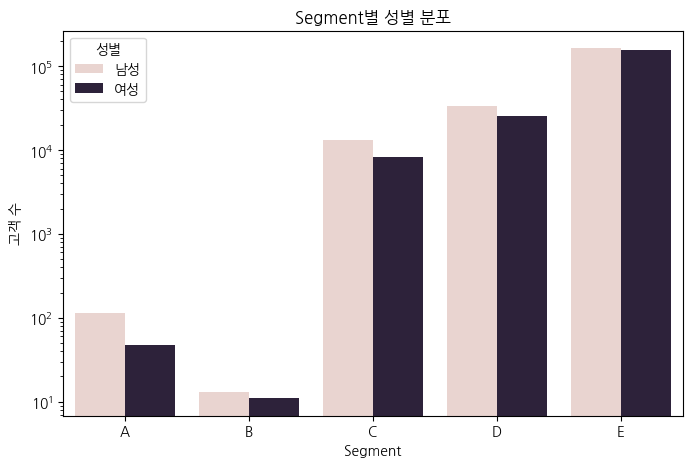

In [7]:
plt.figure(figsize=(8,5))
sns.countplot(x='Segment', hue='남녀구분코드', data=df, order=['A', 'B', 'C', 'D', 'E'])
plt.yscale("log")
plt.title("Segment별 성별 분포")
plt.xlabel("Segment")
plt.ylabel("고객 수")
plt.legend(title="성별", labels=["남성", "여성"])
plt.show()

- 전체적으로 남성 비율이 우세
- Segment A에서 차이가 가장 큼. 장기 남성 고객일 가능성이 높은 세그먼트

### 💳 Segment별 회원 이용 가능 여부

c:\Users\Lee JinSeoung\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Lee JinSeoung\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


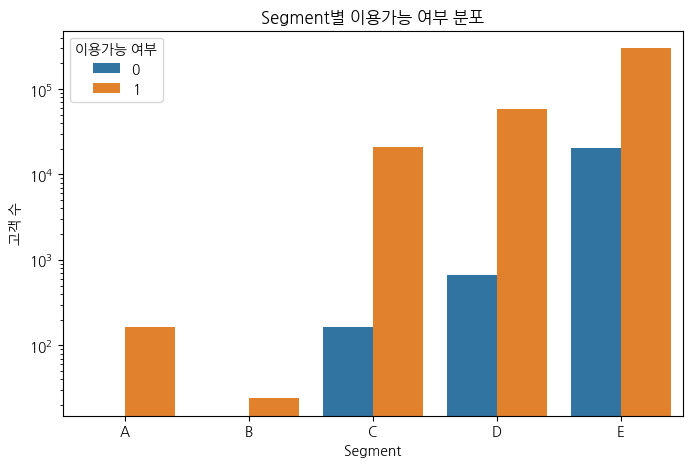

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(x='Segment', hue='회원여부_이용가능', data=df, order=['A', 'B', 'C', 'D', 'E'])
plt.yscale("log")
plt.title("Segment별 이용가능 여부 분포")
plt.xlabel("Segment")
plt.ylabel("고객 수")
plt.legend(title="이용가능 여부")
plt.show()

Segment | 성격 요약
|----|----|
A | 소수의 고령 우량 고객 (이용 가능)
B | 의미 없는 소수
C | 대부분 정상, 일부 리스크 포함된 활동 고객
D | 일반적인 고객군, 중간 리스크 존재
E | 전체 중 다수를 차지, 리스크 고객도 많음 → 세분화 필요

### 💳 유효/이용가능 신용카드 수 평균

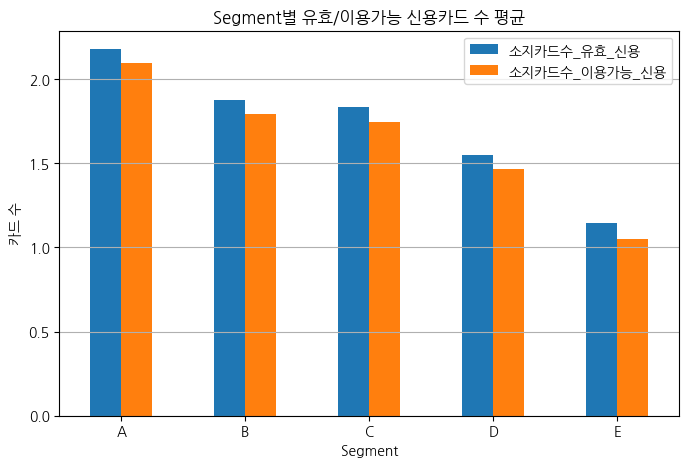

In [11]:
card_stats = df.groupby('Segment')[['소지카드수_유효_신용', '소지카드수_이용가능_신용']].mean()
card_stats.plot(kind='bar', figsize=(8,5))
plt.title("Segment별 유효/이용가능 신용카드 수 평균")
plt.ylabel("카드 수")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Segment | 유효카드 수 | 이용가능카드 수 | 해석 요약
|----|---|---|---|
A | 약 2.2장 | 약 2.1장 | 카드도 많고 거의 다 이용 가능 → 우수 고객
B | 약 1.9장 | 약 1.8장 | 수는 적지만 안정적 소유
C | 약 1.85장 | 약 1.75장 | 활동 고객군, 대부분 이용 가능
D | 약 1.55장 | 약 1.45장 | 이용 가능 비율은 높지만 카드 수 자체는 낮아짐
E | 약 1.15장 | 약 1.05장 | 전체 고객의 대부분, 카드 수와 이용 가능성 모두 가장 낮음

✅ Segment 간 추세 요약
- Segment가 A → E로 갈수록 카드 수와 이용 가능 카드 수가 모두 감소
- Segment가 A에 가까울수록 우량, E에 가까울수록 리스크 또는 신규 중심일 가능성을 암시

### ⏱ Segment별 카드 입회 경과 개월 수

c:\Users\Lee JinSeoung\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


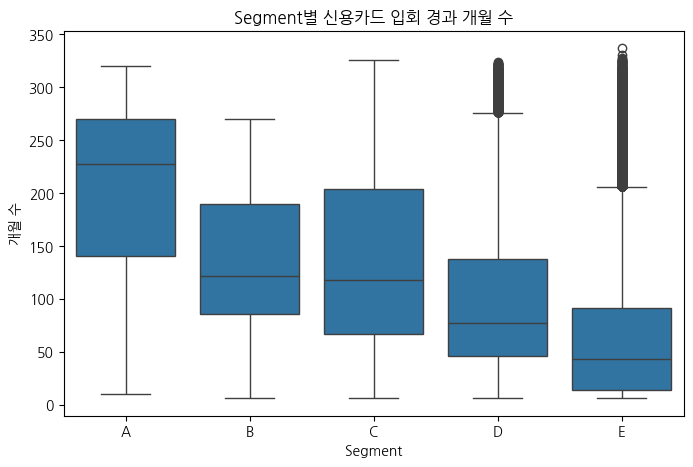

In [13]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Segment', y='입회경과개월수_신용', data=df, order=['A', 'B', 'C', 'D', 'E'])
plt.title("Segment별 신용카드 입회 경과 개월 수")
plt.xlabel("Segment")
plt.ylabel("개월 수")
plt.show()

Segment | 중앙값 | 상자 크기 (IQR) | 이상치 | 해석 요약
|---|---|---|---|---
A | 약 230개월 이상 | 매우 넓음 | 없음 | 장기 고객, 충성도 매우 높음
B | 약 130개월 | 중간 정도 | 없음 | 비교적 오래된 고객군
C | 약 120개월 | 넓음 | 일부 있음 | 활동기간 다양, 중장기 고객 중심
D | 약 70개월 | 좁음 | 일부 있음 | 중기 고객층, 최근 5~10년 내 입회
E | 약 40개월 | 좁고 낮음 | 매우 많은 이상치 | 신규 고객 중심, 일부 장기 고객 포함

✅ Segment A
- 중앙값이 230개월(약 19년) 이상 → 극도로 오래된 장기 고객
- 분포도 넓고 안정적, 이상치 없음 → 충성도 높은 우수 고객 가능성

✅ Segment C, D
- 중간값은 5~10년 사이 → 일반적인 활동 고객군
- 특히 D는 분산이 적고 안정적 → 일반적인 중간 신용 등급 그룹일 가능성

✅ Segment E
- 가장 짧은 경과 기간 → 대부분 최근 3~4년 내 가입
- 이상치(장기 고객)도 일부 있지만, 대체로 신규 고객 or 최근 유입층

전략적 인사이트
Segment | 전략 제안
|---|---|
A | 장기 유지 전략, 우대 프로그램 / 장기 혜택 카드 집중
B | 활동 유지 유도, 포인트/리텐션 중심 마케팅
C/D | 충성도 상승 유도
E | 신규 고객 정착 유도, 기본 혜택 제공 + 이탈 방지 전략

### 📩 Segment별 마케팅 동의율

In [13]:
marketing_rate = df.groupby("Segment")["마케팅동의여부"].mean()
print(marketing_rate)

Segment
A    0.753086
B    0.875000
C    0.754667
D    0.777175
E    0.818313
Name: 마케팅동의여부, dtype: float64


🧠 설명:
- 마케팅 수신 동의율이 높은 Segment는 고객 접촉 가능성 높음
- 마케팅 전략 수립에 활용 가능

### 🔍 분석
Segment | 고객 규모 | 연령대 | 성별 | 이용가능 상태 | 카드 수 | 입회 기간 | 주요 특성 요약
|---|---|---|---|---|---|---|---|
A | 극소수 | 고령(50~60대↑) | 남성 우세 | 대부분 이용 가능 | 카드 多 (2.2장 이상) | 매우 오래됨 (230개월↑) | 우수 장기 고객, 고정 수익원, 고신용 중심
B | 극소수 | 고령 중심, 분산 | 성별 차이 없음 | 대부분 이용 가능 | 카드 보유 중간 | 입회 기간 긴 편 | 드문 예외 고객군, 신중하게 분석 필요
C | 중간 규모 | 30~40대 중심 | 남성 우세 | 대부분 이용 가능 | 카드 多 (1.8장) | 중장기 (120개월 전후) | 우량 활동 고객층, 중간 리스크, 마케팅 타깃 적합
D | 중간~다수 | 다양(20~60대), 중간값 ↑ | 남성 우세 | 대부분 이용 가능 | 카드 수 보통 | 70개월 전후 | 안정적인 중기 고객층, 적절한 관리로 성장 가능
E | 절대다수 | 젊은층 중심 (30~40대), 일부 고령 | 성비 균형 | 이용 불가 고객 다수 혼재 | 카드 적음 (1.1장), 이용 가능 낮음 | 신규 중심 (40개월 이하), 일부 오래된 고객 존재 | 폭넓은 보편 고객층. 하지만 리스크 혼재 → 세분화 필수

전략 계획
전략 항목 | 제안 내용
|---|---|
프리미엄 서비스 타겟 | Segment A, 일부 C
신상품 마케팅 타겟 | Segment C, D
유지 전략 (Retain) | Segment D, 일부 E
정제 및 리스크 관리 대상 | Segment E 전체 중 이용불가, 짧은 입회기간, 카드 수 적음 등 조건 가진 고객군
고객 세분화 정교화 필요 | 특히 Segment E 내부에서 우수 vs 위험 구분 필요